In [ ]:
#pip install geopandas
#pip install folium matplotlib mapclassify #for gdf.explore

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gp
from pathlib import Path
from shapely.geometry import Point, Polygon

In [ ]:
# note the difference here
print(os.getcwd)
print(os.getcwd())


In [ ]:
#shape file location
C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Packages\GeogenicsSourceDataForBojan_420282\commondata\cowu2015\CoWU2015

# side note
Path.home("c:\Windows\etc\etc2") # would not work since "\" reads the string differently...luckily you can do
Path.home(r"c:\Windows\etc\etc2") # to read thins as a raw string


# Pathlib library

In [ ]:
cwd = Path.cwd()
home = Path.home()
print(cwd,"\n",home)

In [ ]:
path = Path()
print(path)
print(path.resolve()) #creates absolute path of that particular file
print(path.exists())

In [ ]:
# basics
datapath = path.resolve() #full path here
print(datapath)
print(datapath.parent)
print(datapath.parent.parent)
print(datapath.parents[3]) # go back 4 parents worth
print("Stem:",datapath.stem)
print("Name of file:",datapath.name)
print("Prints extension:",datapath.suffix) # DOESN'T HAVE AN EXTENSION SO IT PRINTS NOTHING 
print("Is directory/folder?", datapath.is_dir())
print("Is file?", datapath.is_file())

In [ ]:
# creating a file
new_file = Path.cwd() / "new_file.txt"
new_file.touch()

# writing to a file
new_file.write_text("Hello World!")

# deleting a file
new_file.unlink()

# creating a directory
new_dir = Path.cwd() / "new_dir"
new_dir.mkdir()

# deleting a directory
new_dir.rmdir()

In [ ]:
print(datapath)
print(datapath.parents[3])

# Import PHUC4s geodatabase

In [4]:
path = Path()               # put path object into variable
path = path.resolve()       # get full namne of path
print(path)
datapath = path.parents[0] / 'ArcGIS' / 'Projects' / 'Practice' / 'PHUC4s' / 'PHUC4s.shp' # go to layer, right click, properties, source, data source
print(datapath)
print(datapath.exists())

PHUC4s = gp.read_file(datapath)

C:\Users\bmilinic\OneDrive - DOI\Documents\Python
C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\Practice\PHUC4s\PHUC4s.shp
True


In [ ]:
PHUC4s.head()

In [ ]:
PHUC4s.keys()

In [ ]:
PHUC4s.crs

In [ ]:
print(PHUC4s.geometry.type)
print(PHUC4s.geometry.area)

In [ ]:
PHUC4s.head()

In [ ]:
PHUC4s.plot()

Importing ranked data as geodatabase

In [ ]:
datapath = path.parents[0] / 'ArcGIS' / 'Projects' / 'Practice' / 'GeogenicsRankingSheet_WUupdate_20220921.csv' # go to layer, right click, properties, source, data source
print(datapath)
print(datapath.exists())
rankeddata = gp.read_file(datapath)
rankeddata.head()

In [ ]:
rankeddata.shape

In [ ]:
merge = gp.merge(PHUC4s, rankeddata, left_on='CombHUC04_', right_on='Basin ID', how='outer')

Lesson here... you can't merge (attribute join) two gdfs...if you have two geometries you should use spatial join. But rankeddata actually is not spatial so I can recreate using a regular df

# Importing ranked data as normal dataframe

In [5]:
datapath = path.parents[0] / 'ArcGIS' / 'Projects' / 'Practice' / 'GeogenicsRankingSheet_WUupdate_20220921.csv' # go to layer, right click, properties, source, data source
print(datapath)
print(datapath.exists())
rankeddata = pd.read_csv(datapath)
rankeddata.head()

C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\Practice\GeogenicsRankingSheet_WUupdate_20220921.csv
True


,Region number,Basin ID,IR_WU,EPA_Sites,Mines,%_GW_DW,Abs_PPT_change,EJ_Demographic,Den_Native_pop,DOM_GW_pop,...,Human alterations,Historic disparities,System response or stress,Human alterations %tile rank,Historic disparities %tile rank,System response or stress %tile rank,Regional Ranked Score,Regional %tile Rank,National Ranked Score,National %tile Rank
0,1,101,0.091,0.225,0.554,0.695,0.987,0.500,0.951,0.768,...,2.552,3.078,1.718,0.512,0.993,0.654,1,1.000,6.0,0.962
1,1,104,0.030,0.780,0.542,0.420,0.993,0.128,0.439,0.737,...,2.765,1.761,0.993,0.685,0.296,0.216,10,0.149,118.0,0.265
2,1,107,0.353,0.969,0.420,0.298,0.969,0.006,0.810,0.884,...,3.009,1.712,0.963,0.820,0.271,0.197,8,0.303,99.0,0.395
3,1,108,0.109,0.939,0.682,0.176,0.981,0.060,0.603,0.951,...,2.887,1.699,1.152,0.746,0.265,0.302,7,0.389,95.0,0.419
4,1,202,0.170,0.993,0.676,0.140,0.963,0.146,0.896,0.975,...,2.942,2.041,1.260,0.777,0.500,0.345,5,0.568,57.0,0.691


In [6]:
#merge = gp.merge(PHUC4s, rankeddata, left_on='CombHUC04_', right_on='Basin ID', how='outer')
merge = PHUC4s.merge(rankeddata, left_on = 'CombHUC04_', right_on='Basin ID', how='outer')

In [ ]:
merge.plot()

In [ ]:
merge.keys()

In [ ]:
# Basic plot
merge.plot(column="Mines", cmap = 'Blues', k=5, legend=True, legend_kwds={'shrink': 0.6})

In [ ]:
# to reverse a color ramp, just add the suffix, _r
merge.plot(column="Mines", cmap = 'Blues_r', k=5, legend=True, legend_kwds={'shrink': 0.6})

Memory heavy code below...do not run unless you've saved everything

In [ ]:
merge.explore(column='Mines', cmap='Blues')

<AxesSubplot:>

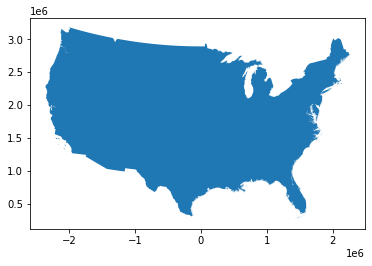

In [8]:
# dissolve
dis = merge.dissolve()
dis.plot()


<AxesSubplot:>

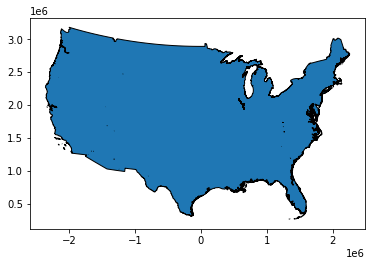

In [9]:
dis.plot(facecolor=None, edgecolor='black')

<AxesSubplot:>

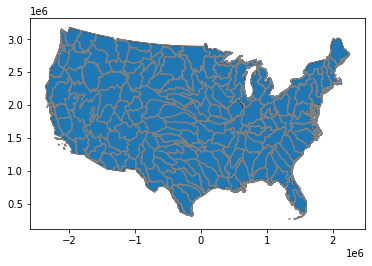

In [19]:
ax=dis.plot(edgecolor='black')
merge.plot(facecolor='None', edgecolor='gray', ax=ax)

<AxesSubplot:>

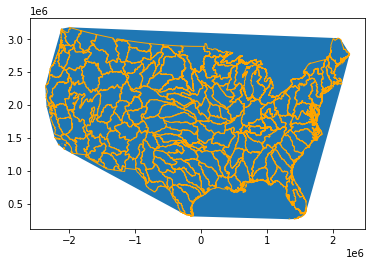

In [16]:
ax = dis.convex_hull.plot()
merge.plot(facecolor=None, edgecolor='orange', ax=ax)

In [21]:
merge.bounds
#overall bounds
tb = merge.total_bounds
tb

array([-2356278.55807315,   268335.30719214,  2257858.64631045,
        3177655.6539411 ])

We can make a polygon from these coordinates with shapely

In [22]:
from shapely.geometry import box 

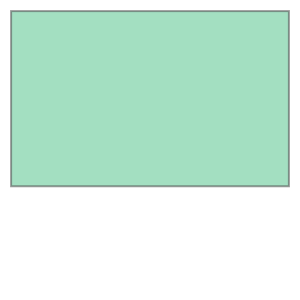

In [25]:
bbox = box(tb[0], tb[1], tb[2], tb[3])
# pro tip - when passing a bunch of ordered arguments, '*' will unpack them #nice
bbox = box(*merge.total_bounds)
bbox

<AxesSubplot:>

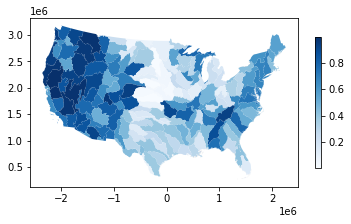

In [30]:
# plot with color ramp
merge.plot(column="Mines", cmap = 'Blues', k=5, legend=True, legend_kwds={'shrink': 0.6})

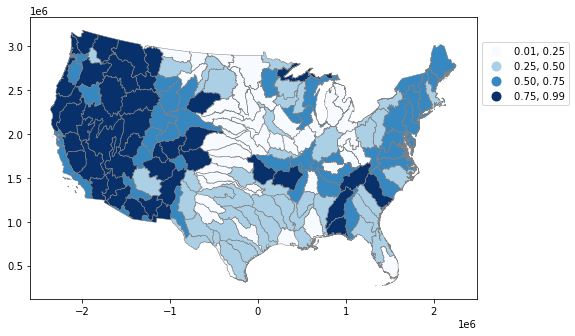

In [43]:
# plot with quantiles
ax = merge.plot(column="Mines", scheme='QUANTILES', cmap = 'Blues', k=4, legend=True, edgecolor='Gray', linewidth=0.5, figsize=(8,8),
                legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1, 0.8)})

In [44]:
labels = [t.get_text() for t in ax.get_legend().get_texts()]
labels

['0.01, 0.25', '0.25, 0.50', '0.50, 0.75', '0.75, 0.99']

In [48]:
import mapclassify
q4 = mapclassify.Quantiles(merge.Mines, k=4)
q4

Quantiles           

  Interval     Count
--------------------
[0.01, 0.25] |    41
(0.25, 0.50] |    41
(0.50, 0.75] |    40
(0.75, 0.99] |    41

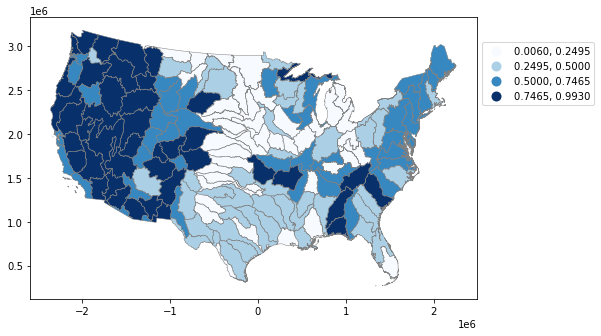

In [50]:
# change rounding
# The new legends_kwds arg fmt takes a string to set the numerical formatting.
ax = merge.plot(column="Mines", scheme='QUANTILES', cmap = 'Blues', k=4, legend=True, edgecolor='Gray', linewidth=0.5, figsize=(8,8),
                legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1, 0.8), 'fmt':"{:.4f}"})

In [53]:
bp = mapclassify.BoxPlot(merge.Mines)
bp

BoxPlot               

   Interval      Count
----------------------
( -inf, -0.50] |     0
(-0.50,  0.25] |    41
( 0.25,  0.50] |    41
( 0.50,  0.75] |    40
( 0.75,  1.49] |    41

In [59]:
bp.get_legend_classes(fmt="{:.3f}")

['(  -inf, -0.496]',
 '(-0.496,  0.249]',
 '( 0.249,  0.500]',
 '( 0.500,  0.746]',
 '( 0.746,  1.492]']

For categorical data just add the keyword argument categorical and set to True 
> ax = df.plot(column='STATE_NAME', categorical=True)

In [ ]:
path = Path()               # put path object into variable
path = path.resolve()       # get full namne of path
print(path)
datapath = path.parents[0] / 'ArcGIS' / 'Projects' / 'Practice' / 'PHUC4s' / 'PHUC4s.shp' # go to layer, right click, properties, source, data source
print(datapath)
print(datapath.exists())

PHUC4s = gp.read_file(datapath)

In [ ]:
C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\ArcProTest\ArcProTest.gdb\EPARegulatedSites_ClipLayer

In [66]:
path = Path()               # put path object into variable
path = path.resolve()       # get full namne of path
print(path)
datapath = path.parents[0] / 'ArcGIS' / 'Projects' / 'ArcProTest' / 'ArcProTest.gdb' / 'EPARegulatedSites_ClipLayer.IGSBCC116LHBMIL' # go to layer, right click, properties, source, data source
print(datapath)
print(datapath.exists())

EPA = gp.read_file(datapath)
#C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\ArcProTest\ArcProTest.gdb\EPARegulatedSites_ClipLayer.IGSBCC116LHBMIL.7476.rd.lock

C:\Users\bmilinic\OneDrive - DOI\Documents\Python
C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\ArcProTest\ArcProTest.gdb\EPARegulatedSites_ClipLayer.IGSBCC116LHBMIL
False


DriverError: C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\ArcProTest\ArcProTest.gdb\EPARegulatedSites_ClipLayer.IGSBCC116LHBMIL: No such file or directory

In [ ]:
path = Path()               # put path object into variable
path = path.resolve()       # get full namne of path
print(path)
datapath = path.parents[0] / 'ArcGIS' / 'Packages' / 'ArcProTest' / 'ArcProTest.gdb' / 'EPARegulatedSites_ClipLayer.IGSBCC116LHBMIL' # go to layer, right click, properties, source, data source
print(datapath)
print(datapath.exists())

Mines = gp.read_file(datapath)
#C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Packages\GeogenicsSourceDataForBojan_420282\p20\gapanalysisgiswork.gdb\MRDS_MinesCraigEdited_Points

# See if I can connect to a GDB

In [67]:
path = Path()               # put path object into variable
path = path.resolve()       # get full namne of path
print(path)
datapath = path.parents[0] / 'ArcGIS' / 'Projects' / 'ArcProTest' / 'ArcProTest.gdb'
print(datapath)
print(datapath.exists())

EPA = gp.read_file(datapath)
#C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\ArcProTest\ArcProTest.gdb\EPARegulatedSites_ClipLayer.IGSBCC116LHBMIL.7476.rd.lock

C:\Users\bmilinic\OneDrive - DOI\Documents\Python
C:\Users\bmilinic\OneDrive - DOI\Documents\ArcGIS\Projects\ArcProTest\ArcProTest.gdb
True


In [81]:
EPA = gp.read_file('../ArcGIS/Projects/ArcProTest/ArcProTest.gdb/', layer='EPARegulatedSites_ClipLayer')

In [ ]:
EPA

In [ ]:
EPA.plot()